#### Data Exploration - Round 1 - Success = IPO(37)  vs. Rest

In [1]:
#Import the required libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import *


plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
os.listdir()

In [2]:
#Import the data
data = pd.read_excel('Final_Data - Round1.xlsx', sheet_name=0)
print(data.shape)
data.head(2)

(2170, 75)


,S.No.,Company,Meta Category,Category,Founded Year,Years in operation,Status,d_success,d_success year,Continent,Country,State/Region,City,Count of Meta Category,Total Number of Rounds,Last Round,Total Number of Investors,Total Amount Raised ($M),Avg. Amount Raised per Round ($M),Largest Funding Round,Highest Amount Raised ($M),Acquisition Date,Acquisition Year,Acquisition Amount ($M),Avg. Acquisition Amount ($M),Acquirer,IPO difference,IPO Date,IPO Year,IPO Raised ($M),IPO Valuation ($M),Unique Amount Raised ($M),Angel_x,Convertible Note_x,Corporate Round_x,Debt Financing_x,Equity Crowdfunding_x,Grant_x,Initial Coin Offering_x,Late Stage_x,Non Equity Assistance_x,Post Ipo Debt_x,Post Ipo Equity_x,Pre Seed_x,Private Equity_x,Product Crowdfunding_x,Secondary Market_x,Seed_x,Series A_x,Series B_x,Series C_x,Undisclosed_x,Venture_x,Round_Calculated,Angel_y,Convertible Note_y,Corporate Round_y,Debt Financing_y,Equity Crowdfunding_y,Grant_y,Initial Coin Offering_y,Late Stage_y,Non Equity Assistance_y,Post Ipo Debt_y,Post Ipo Equity_y,Pre Seed_y,Private Equity_y,Product Crowdfunding_y,Secondary Market_y,Seed_y,Series A_y,Series B_y,Series C_y,Undisclosed_y,Venture_y
0,1,100Credit,Deposits and Lending,Business Lending,2014,5.0,Private,0,NaN,Asia,China,Beijing,Beijing,1,2,Series C,6,267.152423,133.576211,Series C,159.356632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267.152423,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,"['Series C', 'Series B']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,730.0,1568.0,NaN,NaN
1,2,1st Stop Group,Deposits and Lending,Consumer Lending,2004,15.0,Private,0,NaN,Europe,UK,Lancashire,NaN,1,2,Debt,2,158.731418,79.365709,Debt Financing,158.731418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158.731418,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,"['Debt Financing', 'Private Equity']",NaN,NaN,NaN,4962.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4528.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Look into variables
data.columns

In [3]:
# #Renaming variables
# col_dic = {'Angel_x' : 'Angel_round', 'Convertible Note_x' : 'Convertible Note_round',
#            'Corporate Round_x' : 'Corporate Round_round', 'Debt Financing_x' : 'Debt Financing_round',
#            'Equity Crowdfunding_x' : 'Equity Crowdfunding_round', 'Grant_x' : 'Grant_round',
#            'Initial Coin Offering_x' : 'Initial Coin Offering_round', 'Late Stage_x' : 'Late Stage_round',
#            'Non Equity Assistance_x' : 'Non Equity Assistance_round', 'Post Ipo Debt_x' : 'Post Ipo Debt_round',
#            'Post Ipo Equity_x' : 'Post Ipo Equity_round', 'Pre Seed_x' : 'Pre Seed_round',
#            'Private Equity_x' : 'Private Equity_round', 'Product Crowdfunding_x' : 'Product Crowdfunding_round',
#            'Secondary Market_x' : 'Secondary Market_round', 'Seed_x' : 'Seed_round', 'Series A_x' : 'Series A_round',
#            'Series B_x' : 'Series B_round', 'Series C_x' : 'Series C_round', 'Undisclosed_x' : 'Undisclosed_round',
#            'Venture_x' : 'Venture_round', 'Angel_y' : 'Angel_days', 'Convertible Note_y' : 'Convertible Note_days',
#            'Corporate Round_y' : 'Corporate Round_days', 'Debt Financing_y' : 'Debt Financing_days',
#            'Equity Crowdfunding_y' : 'Equity Crowdfunding_days', 'Grant_y' : 'Grant_days',
#            'Initial Coin Offering_y' : 'Initial Coin Offering_days', 'Late Stage_y' : 'Late Stage_days',
#            'Non Equity Assistance_y' : 'Non Equity Assistance_days', 'Post Ipo Debt_y' : 'Post Ipo Debt_days',
#            'Post Ipo Equity_y' : 'Post Ipo Equity_days', 'Pre Seed_y' : 'Pre Seed_days',
#            'Private Equity_y' : 'Private Equity_days', 'Product Crowdfunding_y' : 'Product Crowdfunding_days',
#            'Secondary Market_y' : 'Secondary Market_days', 'Seed_y' : 'Seed_days', 'Series A_y' : 'Series A_days',
#            'Series B_y' : 'Series B_days', 'Series C_y' : 'Series C_days', 'Undisclosed_y' : 'Undisclosed_days',
#            'Venture_y' : 'Venture_days'}

In [4]:
# data.rename(columns=col_dic, inplace=True)

In [ ]:
data.isnull().sum()

In [5]:
data['Status'].value_counts()

Private     1793
Acquired     285
Inactive      54
Public        38
Name: Status, dtype: int64

In [ ]:
list(data.columns)

In [6]:
#Dropping cases where we do not have the years in operation
mydata = data[data['Years in operation'].notnull()]
mydata.shape

(1933, 75)

Note: By dropping cases based on Years in operation we have dropped all the inactive companies. This is due to the fact that the closure date is not available for these companines. Hence, it may not take into account the factors that has caused the closure of the company. Also, we have dropped dropped few other cases where we do not have the founded year.

In [7]:
# Keeping only the required variables in the dataframe
mydata = mydata[['Company', 'Meta Category', 'Category', 'Years in operation', 'Status', 'd_success', 'Continent',
                 'Country', 'Total Number of Rounds', 'Last Round', 'Total Number of Investors',
                 'Total Amount Raised ($M)', 'Avg. Amount Raised per Round ($M)', 'Largest Funding Round',
                 'Highest Amount Raised ($M)', 'Acquisition Amount ($M)', 'Avg. Acquisition Amount ($M)', 
                 'IPO difference', 'IPO Raised ($M)', 'IPO Valuation ($M)', 'Unique Amount Raised ($M)', 'Angel_round',
                 'Convertible Note_round', 'Corporate Round_round', 'Debt Financing_round', 'Equity Crowdfunding_round',
                 'Grant_round', 'Initial Coin Offering_round', 'Late Stage_round', 'Non Equity Assistance_round',
                 'Post Ipo Debt_round', 'Post Ipo Equity_round', 'Pre Seed_round', 'Private Equity_round',
                 'Product Crowdfunding_round', 'Secondary Market_round', 'Seed_round', 'Series A_round', 'Series B_round',
                 'Series C_round', 'Venture_round', 'Angel_days',
                 'Convertible Note_days', 'Corporate Round_days', 'Debt Financing_days', 'Equity Crowdfunding_days',
                 'Grant_days', 'Initial Coin Offering_days', 'Late Stage_days', 'Non Equity Assistance_days',
                 'Post Ipo Debt_days', 'Post Ipo Equity_days', 'Pre Seed_days', 'Private Equity_days',
                 'Product Crowdfunding_days', 'Secondary Market_days', 'Seed_days', 'Series A_days', 'Series B_days',
                 'Series C_days', 'Venture_days']]


In [8]:
mydata.describe()

,Years in operation,d_success,Total Number of Rounds,Total Number of Investors,Total Amount Raised ($M),Avg. Amount Raised per Round ($M),Highest Amount Raised ($M),Acquisition Amount ($M),Avg. Acquisition Amount ($M),IPO difference,IPO Raised ($M),IPO Valuation ($M),Unique Amount Raised ($M),Angel_round,Convertible Note_round,Corporate Round_round,Debt Financing_round,Equity Crowdfunding_round,Grant_round,Initial Coin Offering_round,Late Stage_round,Non Equity Assistance_round,Post Ipo Debt_round,Post Ipo Equity_round,Pre Seed_round,Private Equity_round,Product Crowdfunding_round,Secondary Market_round,Seed_round,Series A_round,Series B_round,Series C_round,Venture_round,Angel_days,Convertible Note_days,Corporate Round_days,Debt Financing_days,Equity Crowdfunding_days,Grant_days,Initial Coin Offering_days,Late Stage_days,Non Equity Assistance_days,Post Ipo Debt_days,Post Ipo Equity_days,Pre Seed_days,Private Equity_days,Product Crowdfunding_days,Secondary Market_days,Seed_days,Series A_days,Series B_days,Series C_days,Venture_days
count,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,71.000000,71.000000,2.000000e+01,27.000000,21.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,1933.000000,157.000000,86.000000,19.000000,220.000000,39.000000,51.000000,4.000000,138.000000,70.000000,6.000000,14.000000,13.000000,69.000000,6.000000,30.000000,946.000000,824.00000,510.000000,273.000000,502.000000
mean,7.110709,0.019141,2.980859,4.167098,64.384177,15.163087,36.307936,421.060615,421.060615,1.850489e+09,289.442886,2054.981968,62.144686,0.101397,0.061562,0.011899,0.175892,0.033626,0.035178,0.002069,0.130885,0.038282,0.005691,0.019141,0.007243,0.041386,0.003621,0.019141,0.749612,0.487843,0.303673,0.161407,0.389033,698.152866,1261.581395,2361.157895,2033.086364,1815.282051,1438.745098,1112.500000,2868.586957,1122.428571,3821.166667,3540.571429,510.076923,3255.434783,946.666667,2928.666667,769.668076,1186.86165,1672.603922,2102.142857,1939.517928
std,3.875409,0.137057,2.375937,4.761443,541.941626,136.038647,334.351844,769.646225,769.646225,1.926302e+09,338.426293,2207.441040,541.435570,0.438876,0.331002,0.130150,0.642764,0.286709,0.262974,0.045454,0.556296,0.202427,0.130569,0.269471,0.090714,0.228290,0.068156,0.161341,1.012554,0.621794,0.550148,0.424191,0.806754,646.168204,1029.495176,1215.502971,1315.153267,833.827129,1329.802224,536.031405,1172.123064,782.487645,1273.979814,1491.119028,370.825534,1828.743039,764.249087,1678.546566,600.475422,777.24786,892.245154,996.794759,1407.128316
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.700000,4.700000,1.800000e+07,2.926760,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-184.000000,-144.000000,493.000000,152.000000,496.000000,-427.000000,538.000000,312.000000,0.000000,1605.000000,1036.000000,-171.000000,87.000000,262.000000,365.000000,-935.000000,-730.00000,213.000000,-481.000000,-5792.000000
25%,4.000000,0.000000,1.000000,1.000000,0.025000,0.020284,0.030000,55.872417,55.872417,2.623919e+08,47.648450,273.000000,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,273.000000,507.000000,1567.000000,1116.000000,1109.500000,538.000000,816.250000,2105.000000,513.000000,3399.000000,2540.500000,360.000000,1975.000000,365.750000,1934.750000,387.000000,652.50000,1054.250000,1410.000000,1008.250000
50%,6.000000,0.000000,2.000000,3.000000,5.010000,2.100000,4.000000,144.900000,144.900000,1.250750e+09,164.000000,1364.000000,4.787549,0.000000,0.000000,0.000000,0.000000,0.000

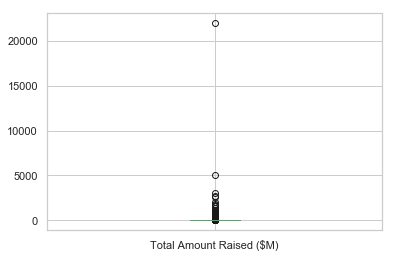

In [9]:
data['Total Amount Raised ($M)'].plot.box(grid=True);

In [10]:
# Dropping rows with 'Amount raised =22000'
mydata = mydata[mydata['Total Amount Raised ($M)']!=22000]
mydata.shape

(1932, 61)

In [11]:
#Look into the category split in the target variable
print(mydata['d_success'].value_counts())
print("\n")

suc=len(mydata[mydata['d_success']==1])
fail=len(mydata[mydata['d_success']==0])
tot=suc+fail

print("% of success {}%".format(round(suc/tot*100,2)))
print("% of failure {}%".format(round(fail/tot*100,2)))

0    1895
1      37
Name: d_success, dtype: int64


% of success 1.92%
% of failure 98.08%


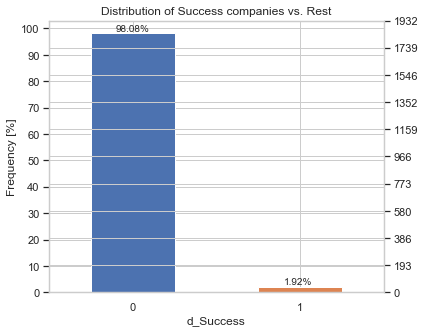

In [12]:
# ax = sns.countplot(x='d_success', data=mydata, palette='hls')
# plt.show()
# plt.savefig('target.jpg')

plt.figure(figsize=(6,5))
plt.title('Distribution of Success companies vs. Rest')
plt.xlabel('d_Success')
plt.ylabel('Frequency [%]')

ax = (mydata.d_success.value_counts()/len(mydata)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(mydata)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))


In [ ]:
#Look into #of unique companies
print("No. of unique companies {}".format(mydata['Company'].nunique()))
mydata['Company'].value_counts()

In [ ]:
# mydata['Founded Year'].unique()

In [ ]:
# sum(mydata['Founded Year']=='Data NA')
mydata['Years in operation'].isnull().sum()

In [ ]:
mydata.isnull().sum()

In [13]:
mydata1 = mydata.copy()

In [14]:
mydata1['Last Round'].fillna('Data NA', inplace=True)

In [15]:
cat_vars = mydata1.select_dtypes(include=['object']).columns.tolist()
cat_vars.remove('Company')
cat_vars.remove('Country')
cat_vars.remove('Status')
cat_vars.remove('Category')
cat_vars

['Meta Category', 'Continent', 'Last Round', 'Largest Funding Round']

In [16]:
#Creating dummies for categorical variables
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=mydata1.join(cat_list)
    mydata1=data1

In [18]:
#Dropping the original categorical variables after creating the dummies
data_vars=mydata1.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
to_keep

['Company',
 'Category',
 'Years in operation',
 'Status',
 'd_success',
 'Country',
 'Total Number of Rounds',
 'Total Number of Investors',
 'Total Amount Raised ($M)',
 'Avg. Amount Raised per Round ($M)',
 'Highest Amount Raised ($M)',
 'Acquisition Amount ($M)',
 'Avg. Acquisition Amount ($M)',
 'IPO difference',
 'IPO Raised ($M)',
 'IPO Valuation ($M)',
 'Unique Amount Raised ($M)',
 'Angel_round',
 'Convertible Note_round',
 'Corporate Round_round',
 'Debt Financing_round',
 'Equity Crowdfunding_round',
 'Grant_round',
 'Initial Coin Offering_round',
 'Late Stage_round',
 'Non Equity Assistance_round',
 'Post Ipo Debt_round',
 'Post Ipo Equity_round',
 'Pre Seed_round',
 'Private Equity_round',
 'Product Crowdfunding_round',
 'Secondary Market_round',
 'Seed_round',
 'Series A_round',
 'Series B_round',
 'Series C_round',
 'Venture_round',
 'Angel_days',
 'Convertible Note_days',
 'Corporate Round_days',
 'Debt Financing_days',
 'Equity Crowdfunding_days',
 'Grant_days',
 'Init

In [19]:
#Final data columns
mydata1=mydata1[to_keep]
mydata1.columns.values

array(['Company', 'Category', 'Years in operation', 'Status', 'd_success',
       'Country', 'Total Number of Rounds', 'Total Number of Investors',
       'Total Amount Raised ($M)', 'Avg. Amount Raised per Round ($M)',
       'Highest Amount Raised ($M)', 'Acquisition Amount ($M)',
       'Avg. Acquisition Amount ($M)', 'IPO difference',
       'IPO Raised ($M)', 'IPO Valuation ($M)',
       'Unique Amount Raised ($M)', 'Angel_round',
       'Convertible Note_round', 'Corporate Round_round',
       'Debt Financing_round', 'Equity Crowdfunding_round', 'Grant_round',
       'Initial Coin Offering_round', 'Late Stage_round',
       'Non Equity Assistance_round', 'Post Ipo Debt_round',
       'Post Ipo Equity_round', 'Pre Seed_round', 'Private Equity_round',
       'Product Crowdfunding_round', 'Secondary Market_round',
       'Seed_round', 'Series A_round', 'Series B_round', 'Series C_round',
       'Venture_round', 'Angel_days', 'Convertible Note_days',
       'Corporate Round_days', 'D

In [20]:
# Dropping 'Largest Funding Round_Undisclosed' and 'Last Round_Data NA'
mydata1 = mydata1.drop(['Company', 'Country', 'Category', 'Status','Largest Funding Round_Undisclosed', 'Continent_Data unavailable'], axis=1)
print(mydata1.shape)
print(mydata.shape)

(1932, 99)
(1932, 61)


In [22]:
#Look into the mean
mean_byTarget = pd.DataFrame(mydata1.groupby('d_success').mean())
mean_byTarget_T = mean_byTarget.T
mean_byTarget.T
# mean_byTarget_T.to_excel('mean_byTarget_Round1_V2.xlsx')

d_success,0,1
Years in operation,7.022164,1.170270e+01
Total Number of Rounds,2.933509,5.378378e+00
Total Number of Investors,4.098153,7.459459e+00
Total Amount Raised ($M),47.546468,3.338935e+02
Avg. Amount Raised per Round ($M),11.619407,4.841813e+01
Highest Amount Raised ($M),26.433075,1.646638e+02
Acquisition Amount ($M),421.060615,NaN
Avg. Acquisition Amount ($M),421.060615,NaN
IPO difference,NaN,1.850489e+09
IPO Raised ($M),NaN,2.894429e+02


##### Observation

1. The average years of operation for the companies that were successful is greater than other companies
2. Total number of rounds and total investors for the companies that are successful is greater than other company

#### Independent Sample T-Test

In [71]:
# Function to return list of all the significant variables
import scipy
import warnings
warnings.filterwarnings("ignore")

data0 = mydata1[mydata1['d_success']==0]
data1 = mydata1[mydata1['d_success']==1]

only_var = []
sig_var = pd.DataFrame()
for var in data0.columns:
    twoSampleTest = scipy.stats.ttest_ind(data0[var], data1[var])
    if twoSampleTest[1]<=.05:
        only_var.append(var)
        sig_var = sig_var.append({'Significant variables':var, 'pvalue':round(twoSampleTest[1],5)}, ignore_index=True)

print(sig_var)
print('\n\n')
print(only_var)

                     Significant variables   pvalue
0                       Years in operation  0.00000
1                                d_success  0.00000
2                   Total Number of Rounds  0.00000
3                Total Number of Investors  0.00002
4                 Total Amount Raised ($M)  0.00000
5        Avg. Amount Raised per Round ($M)  0.00004
6               Highest Amount Raised ($M)  0.00000
7                Unique Amount Raised ($M)  0.00000
8                         Late Stage_round  0.00000
9                      Post Ipo Debt_round  0.00000
10                   Post Ipo Equity_round  0.00000
11                  Secondary Market_round  0.00000
12                              Seed_round  0.00066
13                          Series B_round  0.04080
14                          Series C_round  0.00008
15                           Venture_round  0.00512
16         Continent_Australia/New Zealand  0.00055
17                         Last Round_Debt  0.00008
18          

In [72]:
# sig_var.to_csv('Significant_var_round1.csv', index=False)

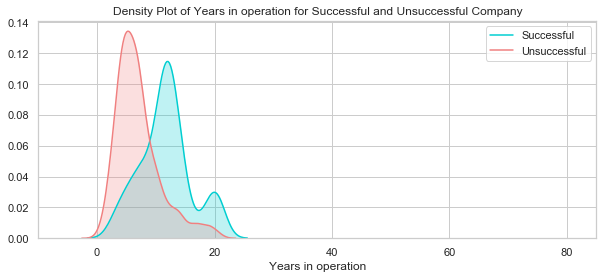

In [26]:
#Density plot for years of operation and target variable
plt.figure(figsize=(10,4))
ax = sns.kdeplot(mydata["Years in operation"][mydata.d_success == 1], color="darkturquoise", shade=True)
sns.kdeplot(mydata["Years in operation"][mydata.d_success == 0], color="lightcoral", shade=True)
plt.legend(['Successful', 'Unsuccessful'])
plt.title('Density Plot of Years in operation for Successful and Unsuccessful Company')
ax.set(xlabel='Years in operation')
plt.xlim(-10,85)
plt.show()

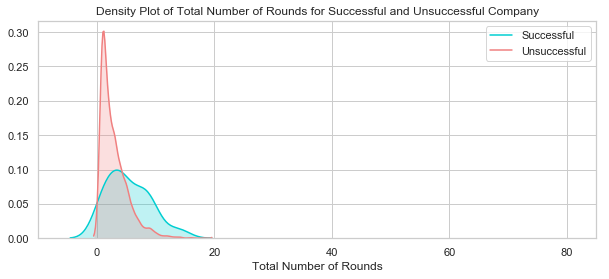

In [27]:
#Density plot for # of rounds and target variable
plt.figure(figsize=(10,4))
ax = sns.kdeplot(mydata["Total Number of Rounds"][mydata.d_success == 1], color="darkturquoise", shade=True)
sns.kdeplot(mydata["Total Number of Rounds"][mydata.d_success == 0], color="lightcoral", shade=True)
plt.legend(['Successful', 'Unsuccessful'])
plt.title('Density Plot of Total Number of Rounds for Successful and Unsuccessful Company')
ax.set(xlabel='Total Number of Rounds')
plt.xlim(-10,85)
plt.show()

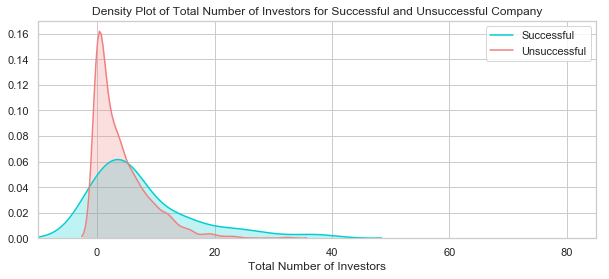

In [28]:
#Density plot for total investors and target variable
plt.figure(figsize=(10,4))
ax = sns.kdeplot(mydata["Total Number of Investors"][mydata.d_success == 1], color="darkturquoise", shade=True)
sns.kdeplot(mydata["Total Number of Investors"][mydata.d_success == 0], color="lightcoral", shade=True)
plt.legend(['Successful', 'Unsuccessful'])
plt.title('Density Plot of Total Number of Investors for Successful and Unsuccessful Company')
ax.set(xlabel='Total Number of Investors')
plt.xlim(-10,85)
plt.show()

In [ ]:
#Lets look mean by Meta Category
mydata.groupby('Meta Category').mean()

In [29]:
#Lets look mean by Meta Category and target
meta_success = mydata.groupby(['Meta Category', 'd_success']).mean()
meta_success_T = meta_success.T
meta_success_T
meta_success_T.to_csv('meta_success_round1_v2.csv')

In [30]:
pd.crosstab(mydata['Meta Category'], mydata['d_success'])

d_success,0,1
Meta Category,,
Banking Operations,129,1
Capital Raising,175,2
Deposits and Lending,531,15
Financial Management,465,8
Payments,595,11


###### Observations

1. Banking Operations are getting success much quicker with minimum rounds
2. Payments sector is getting success in less #of rounds than others

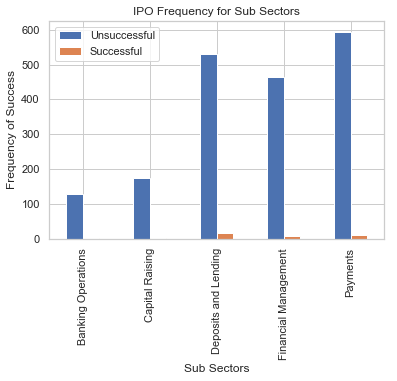

In [31]:
#Visualization

fig, ax = subplots()
pd.crosstab(mydata['Meta Category'],mydata.d_success).plot(kind='bar', ax=ax)
plt.title('IPO Frequency for Sub Sectors')
plt.xlabel('Sub Sectors')
plt.ylabel('Frequency of Success')
ax.legend(['Unsuccessful', 'Successful']);
#plt.savefig('sub_sector_success')

In [ ]:
plt.rcParams['figure.figsize']=15,4
table=pd.crosstab(mydata['Total Number of Investors'],mydata.d_success)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Total # of investors vs Target')
plt.xlabel('Total # of investors')
plt.ylabel('Proportion of company');
#plt.savefig('inv_vs_comp_stack')

In [ ]:
plt.rcParams['figure.figsize']=8,4
mydata['Years in operation'].hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency');
#plt.savefig('hist_age')

Lets plot the distribution of all the continuous variables in  the data set.

In [ ]:
print(mydata.shape)
data1 = mydata.iloc[:,1:25]
data2 = mydata.iloc[:,26:50]
data3 = mydata.iloc[:,51:67]

data1[data1.dtypes[(data1.dtypes=="float64")|(data1.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])
data2[data2.dtypes[(data2.dtypes=="float64")|(data2.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])
data3[data3.dtypes[(data3.dtypes=="float64")|(data3.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11]);

In [36]:
cou_success=pd.crosstab(mydata['Country'], mydata['d_success'])
cou_success=pd.crosstab(mydata['Country'], mydata['d_success'], normalize='index').round(4)*100
# cou_success
cou_success.to_csv('cou_success_round1_v2.csv')

###### Observations

1. Maximum IPO from USA(16) followed by China(5), Canada(4)
2. However, % of success is more (>10%) in New Zealand, Netherland, Russia, China

In [ ]:
pd.crosstab(mydata['Continent'], mydata['d_success'])

In [ ]:
pd.crosstab(mydata['Continent'], mydata['d_success'], normalize='index').round(4)*100

In [37]:
# #Selecting final variables for modeling
mydata_model = mydata[['d_success', 'Total Number of Rounds', 'Total Amount Raised ($M)', 'Unique Amount Raised ($M)',
                       'Meta Category', 'Highest Amount Raised ($M)', 'Years in operation',
                       'Angel_round', 'Convertible Note_round', 'Continent', 'Largest Funding Round',
                       'Total Number of Investors', 'Last Round', 'Corporate Round_round', 'Debt Financing_round',
                       'Equity Crowdfunding_round', 'Grant_round', 'Initial Coin Offering_round', 'Late Stage_round',
                       'Non Equity Assistance_round', 'Pre Seed_round', 'Private Equity_round',
                       'Product Crowdfunding_round', 'Secondary Market_round', 'Seed_round', 'Series A_round',
                       'Series B_round', 'Series C_round', 'Venture_round']]


print(mydata_model.shape)

(1932, 29)


In [ ]:
mydata_model.groupby('d_success').mean()

In [38]:
mydata_model.to_excel('mydata_model_round1_V2.xlsx', index=False)

In [ ]:
# #Function to check the number of positive and negative values in a dataframe
# def manipulate_data(data):
#     positive_count = 0
#     negative_sum = 0
#     for n in data:
#         if n > 0:
#             positive_count += 1
#         elif n < 0:
#             negative_sum += n

#     return [positive_count, negative_sum]